# SVM (Support Vector Machine) - using Breast Cancer dataset

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt

In [2]:
from sklearn import datasets

# Load the datset

In [4]:
data= datasets.load_breast_cancer()

In [5]:
X = data.data # Independent Variable

In [6]:
y = data.target # Dependent Variable

# Split the data into training and test

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape, y_train.shape

((455, 30), (455,))

In [10]:
X_test.shape, y_test.shape

((114, 30), (114,))

In [15]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler= StandardScaler()

In [19]:
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building -SVM 

In [19]:
from sklearn.svm import SVC

In [20]:
model= SVC(kernel= "linear", C = 1)

In [21]:
# train the SVM

In [22]:
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

# Prediction

In [23]:
y_pred = model.predict(X_test)

# Model Evaluation

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
print('Confusion Matrix')
CN = confusion_matrix(y_test, y_pred)
print(cn)

Confusion Matrix
[[39  4]
 [ 1 70]]


In [27]:
print('Classification Report')
CR = classification_report(y_test, y_pred)
print(CR)

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Principal Component Analysis (PCA)

In [28]:
pd.DataFrame(X, columns=data.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Using PCA

In [29]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=2) # make 2 columns

In [32]:
X_train_pca = pca.fit_transform(X_train)

In [33]:
pd.DataFrame(X_train_pca).head(3)

,0,1
0,-684.157477,-55.264969
1,1379.328381,-75.106112
2,-690.799946,-38.583966


# Visualize the data

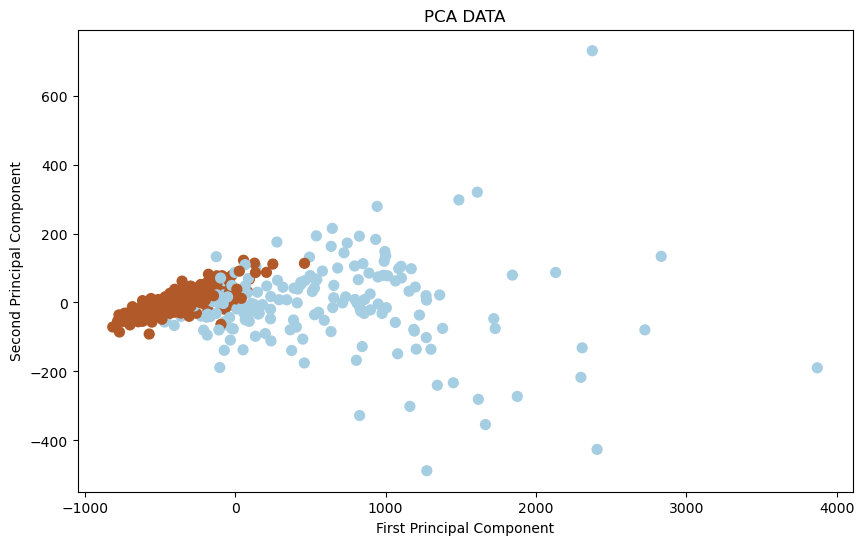

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c= y_train,cmap=plt.cm.Paired,s=50,label='Training Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.title('PCA DATA')
plt.show()

In [38]:
model_1=SVC(kernel='linear')

In [43]:
# train the model
model_1.fit(X_train_pca, y_train)

SVC(kernel='linear')

In [44]:
# transform our X_test
X_test_pca = pca.transform(X_test)

In [45]:
y_pred_1 = model_1.predict(X_test_pca)

In [46]:
print('Classification Report')
CR1 = classification_report(y_test, y_pred_1)
print(CR1)

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

